# EN3150 Assignment 02
## Learning from data and related challenges and classification

### **1 Logistic regression**

#### 1. Load data

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [ ]:
print(X.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


#### 2. Train the model using 'saga' solver

In [ ]:
 #Split the data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

 # Train the logistic regression model. Here we are using saga solver to learn weights.
 logreg = LogisticRegression(solver='saga')
 logreg.fit(X_train, y_train)

 # Predict on the testing data
 y_pred = logreg.predict(X_test)

 # Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 print("Accuracy:", accuracy)
 print(logreg.coef_, logreg.intercept_)

NameError: name 'train_test_split' is not defined

In [ ]:
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df_filtered['species'])

# Select features (drop target columns)
X = df_filtered.drop(['species'], axis=1)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.75514365e-03 -8.11743284e-05  4.73445486e-04 -2.87084510e-04
   3.06576060e-04  1.85164705e-04 -1.04571737e-04  1.09434453e-05]] [-8.49013702e-06]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 3. Train the model using 'liblinear' solver

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using liblinear to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.32621379 -1.25548308 -0.12756343 -0.00312309  1.24947049  0.7210066
  -0.55671955 -0.22369071]] [-0.08354891]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Load and clean dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter for two classes
df_filtered = df[df['species'].isin(['Adelie', 'Chinstrap'])].copy()
y = df_filtered['species'].map({'Adelie':0, 'Chinstrap':1})  # simple encoding
X = pd.get_dummies(df_filtered.drop('species', axis=1), drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train liblinear
logreg_lib = LogisticRegression(solver='liblinear')
logreg_lib.fit(X_train_scaled, y_train)
y_pred_lib = logreg_lib.predict(X_test_scaled)
acc_lib = accuracy_score(y_test, y_pred_lib)

# Train saga
logreg_saga = LogisticRegression(solver='saga', max_iter=1000)
logreg_saga.fit(X_train_scaled, y_train)
y_pred_saga = logreg_saga.predict(X_test_scaled)
acc_saga = accuracy_score(y_test, y_pred_saga)

print("Accuracy with liblinear:", acc_lib)
print("Accuracy with saga:", acc_saga)


Accuracy with liblinear: 1.0
Accuracy with saga: 1.0


###  3 Logistic regression First/Second-Order Methods

#### 1. Generating data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

#### 2. Batch gradient descent to update weights

Iteration 1, Loss: 0.3858
Iteration 2, Loss: 0.2454
Iteration 3, Loss: 0.1911
Iteration 4, Loss: 0.1677
Iteration 5, Loss: 0.1556
Iteration 6, Loss: 0.1477
Iteration 7, Loss: 0.1415
Iteration 8, Loss: 0.1362
Iteration 9, Loss: 0.1313
Iteration 10, Loss: 0.1269
Iteration 11, Loss: 0.1228
Iteration 12, Loss: 0.1189
Iteration 13, Loss: 0.1152
Iteration 14, Loss: 0.1118
Iteration 15, Loss: 0.1086
Iteration 16, Loss: 0.1055
Iteration 17, Loss: 0.1026
Iteration 18, Loss: 0.0999
Iteration 19, Loss: 0.0973
Iteration 20, Loss: 0.0948


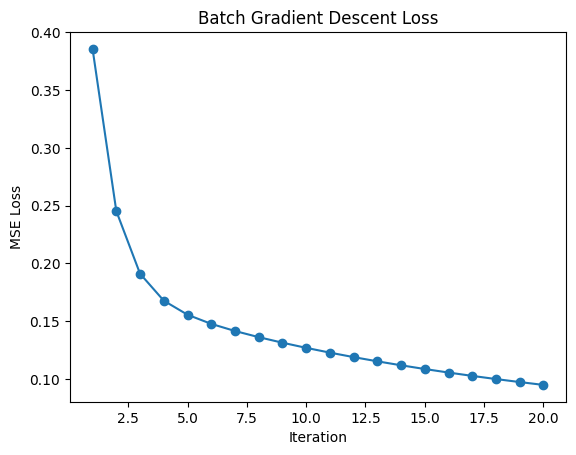

In [ ]:
y = y.reshape(-1, 1)

# Add bias column
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize weights and bias
n_features = X.shape[1]
w = np.random.randn(n_features, 1) * 0.01
b = 0.0

# Learning rate and iterations
lr = 0.01
iterations = 20

# Store loss for visualization
loss_bgd = []

# Batch Gradient Descent
for i in range(iterations):
    # Predictions (linear regression)
    y_hat = np.dot(X, w) + b

    # Compute Mean Squared Error Loss
    loss = np.mean((y_hat - y)**2)
    loss_bgd.append(loss)

    # Compute gradients
    dw = (2 / X.shape[0]) * np.dot(X.T, (y_hat - y))
    db = (2 / X.shape[0]) * np.sum(y_hat - y)

    # Update weights and bias
    w -= lr * dw
    b -= lr * db

    print(f"Iteration {i+1}, Loss: {loss:.4f}")


#### 3. Newton's method to update weights

Iteration 1, Loss: 0.4434
Iteration 2, Loss: 0.0099
Iteration 3, Loss: 0.0099
Iteration 4, Loss: 0.0099
Iteration 5, Loss: 0.0099
Iteration 6, Loss: 0.0099
Iteration 7, Loss: 0.0099
Iteration 8, Loss: 0.0099
Iteration 9, Loss: 0.0099
Iteration 10, Loss: 0.0099
Iteration 11, Loss: 0.0099
Iteration 12, Loss: 0.0099
Iteration 13, Loss: 0.0099
Iteration 14, Loss: 0.0099
Iteration 15, Loss: 0.0099
Iteration 16, Loss: 0.0099
Iteration 17, Loss: 0.0099
Iteration 18, Loss: 0.0099
Iteration 19, Loss: 0.0099
Iteration 20, Loss: 0.0099


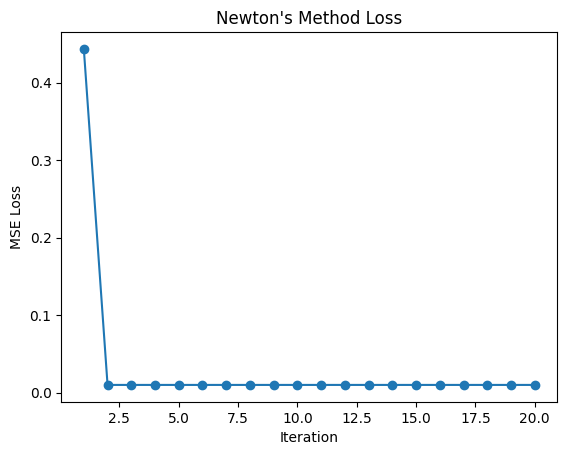

In [ ]:
y = y.reshape(-1, 1)

# Add bias column
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Add a column of ones for bias term
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize weights (including bias)
n_features = X_bias.shape[1]
w = np.random.randn(n_features, 1) * 0.01

# Store loss for visualization
loss_newton = []

# Newton's Method iterations
for i in range(20):
    # Predictions
    y_hat = np.dot(X_bias, w)

    # Compute MSE loss
    loss = np.mean((y_hat - y)**2)
    loss_newton.append(loss)

    # Gradient
    grad = (2 / X_bias.shape[0]) * np.dot(X_bias.T, (y_hat - y))

    # Hessian
    H = (2 / X_bias.shape[0]) * np.dot(X_bias.T, X_bias)

    # Update weights
    w -= np.linalg.inv(H).dot(grad)

    print(f"Iteration {i+1}, Loss: {loss:.4f}")


#### 4. Plotting results in the same plot

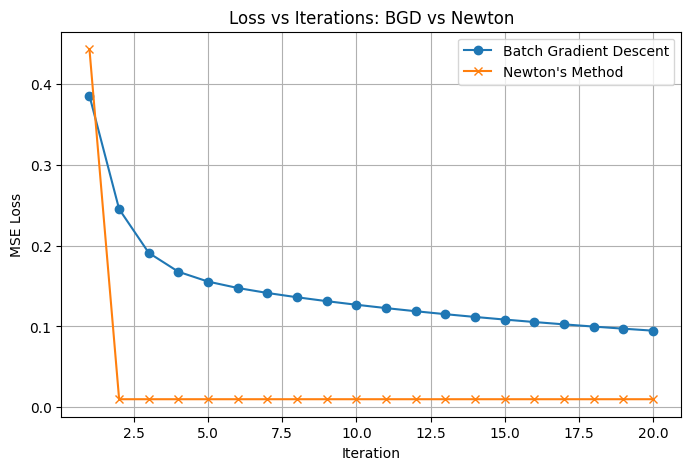

In [ ]:
# ---------------- Plotting ----------------
plt.figure(figsize=(8,5))
plt.plot(range(1, iterations+1), loss_bgd, marker='o', label='Batch Gradient Descent')
plt.plot(range(1, iterations+1), loss_newton, marker='x', label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss vs Iterations: BGD vs Newton')
plt.legend()
plt.grid(True)
plt.show()

#### 5. Batch Gradient descent with updated data generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# New centers
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]  # updated centers
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [ ]:
y = y.reshape(-1, 1)

# Add bias column
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize weights
n_features = X_bias.shape[1]
w = np.random.randn(n_features, 1) * 0.01

# Learning rate and iterations
lr = 0.01
iterations = 20
loss_bgd = []

# Batch Gradient Descent
for i in range(iterations):
    y_hat = np.dot(X_bias, w)
    loss = np.mean((y_hat - y)**2)
    loss_bgd.append(loss)

    grad = (2 / X_bias.shape[0]) * np.dot(X_bias.T, (y_hat - y))
    w -= lr * grad

    print(f"Iteration {i+1}, Loss: {loss:.4f}")

Iteration 1, Loss: 0.3912
Iteration 2, Loss: 0.2510
Iteration 3, Loss: 0.2079
Iteration 4, Loss: 0.1919
Iteration 5, Loss: 0.1834
Iteration 6, Loss: 0.1774
Iteration 7, Loss: 0.1721
Iteration 8, Loss: 0.1673
Iteration 9, Loss: 0.1628
Iteration 10, Loss: 0.1586
Iteration 11, Loss: 0.1545
Iteration 12, Loss: 0.1507
Iteration 13, Loss: 0.1471
Iteration 14, Loss: 0.1437
Iteration 15, Loss: 0.1404
Iteration 16, Loss: 0.1374
Iteration 17, Loss: 0.1345
Iteration 18, Loss: 0.1317
Iteration 19, Loss: 0.1291
Iteration 20, Loss: 0.1266


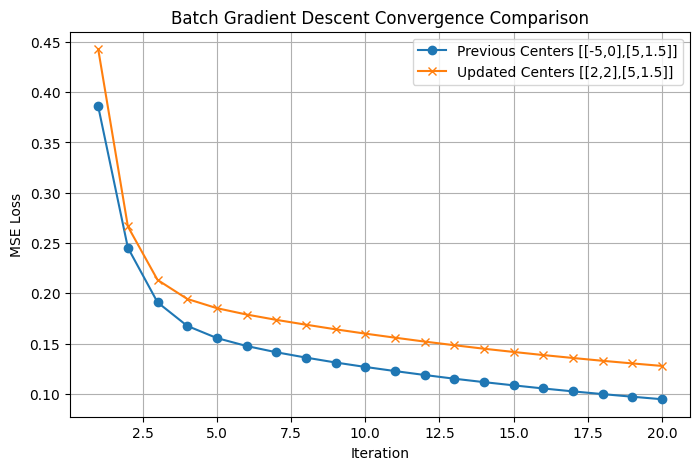

In [ ]:
# Loss history for previous dataset
loss_prev = [0.3858, 0.2454, 0.1911, 0.1677, 0.1556, 0.1477, 0.1415, 0.1362,
             0.1313, 0.1269, 0.1228, 0.1189, 0.1152, 0.1118, 0.1086, 0.1055,
             0.1026, 0.0999, 0.0973, 0.0948]

# Loss history for updated dataset
loss_updated = [0.4427, 0.2665, 0.2134, 0.1945, 0.1853, 0.1790, 0.1737, 0.1689,
                0.1643, 0.1600, 0.1560, 0.1521, 0.1485, 0.1450, 0.1418, 0.1387,
                0.1358, 0.1330, 0.1304, 0.1279]

iterations = range(1, 21)

plt.figure(figsize=(8,5))
plt.plot(iterations, loss_prev, marker='o', label='Previous Centers [[-5,0],[5,1.5]]')
plt.plot(iterations, loss_updated, marker='x', label='Updated Centers [[2,2],[5,1.5]]')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Batch Gradient Descent Convergence Comparison')
plt.legend()
plt.grid(True)
plt.show()